In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('responseFile_with_statistics.csv')

In [47]:
df.head()

,Elapsed Time (ms),Response Time (ms),Alphabet,Correct,Error Type,Pitch,Yaw,Roll,std_pitch,var_pitch,...,var_yaw,mean_yaw,mode_yaw,median_yaw,std_roll,var_roll,mean_roll,mode_roll,median_roll,Attentive
0,1267,1267,P,Yes,NaN,180,184,176,3.13,9.79,...,7406.70,177.71,0.0,180.0,3.26,10.64,175.14,178.0,175.0,1
1,3334,1322,O,Yes,NaN,177,177,177,3.63,13.16,...,5533.90,177.97,176.0,179.0,2.91,8.48,175.55,177.0,176.0,1
2,4805,790,N,Yes,NaN,176,185,176,3.76,14.12,...,4693.73,178.39,179.0,179.0,2.70,7.31,175.68,177.0,176.0,1
3,6994,971,C,Yes,NaN,175,167,176,1.51,2.29,...,41.63,175.24,168.0,177.0,0.50,0.25,176.56,177.0,177.0,1
4,8762,738,P,Yes,NaN,178,185,174,1.31,1.70,...,50.14,174.38,168.0,173.0,0.97,0.94,175.72,176.0,176.0,1


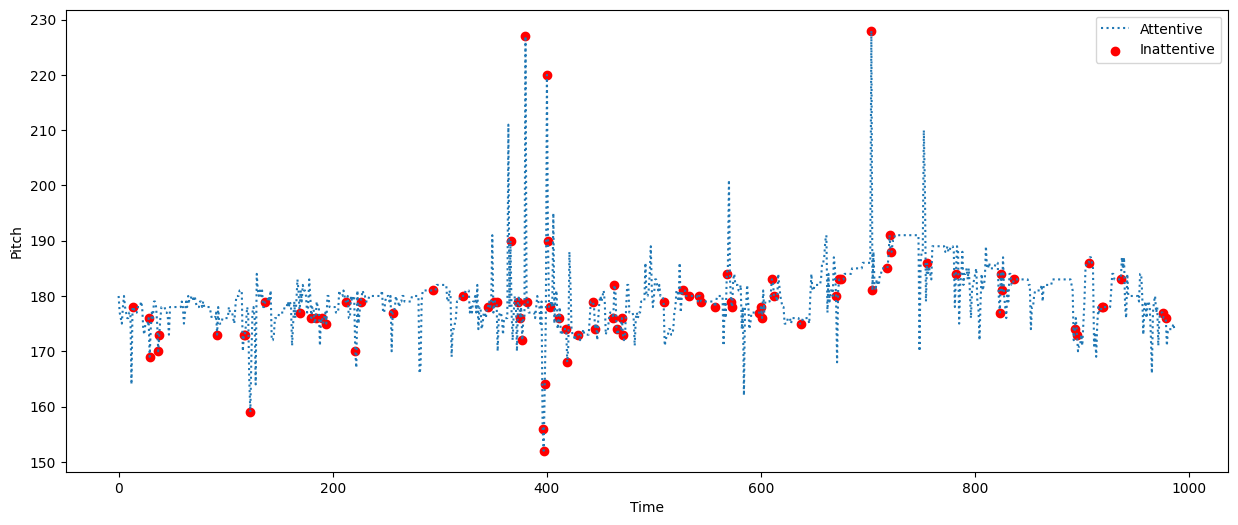

In [62]:
import seaborn as sns
plt.figure(figsize=(15, 6))
incorrect = df[df.Attentive == 0]
# plt.plot(df.index, df['Roll'], label='Attentive', linestyle='dotted')
# plt.scatter(incorrect.index, incorrect['Roll'], label = "Inattentive", color='red')
# plt.plot(df.index, df['Yaw'], label='Attentive', linestyle='dotted')
# plt.scatter(incorrect.index, incorrect['Yaw'], label = "Inattentive", color='red')
plt.plot(df.index, df['Pitch'], label='Attentive', linestyle='dotted')
plt.scatter(incorrect.index, incorrect['Pitch'], label = "Inattentive", color='red')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.legend()
plt.show()

In [80]:
percentage_values

aAttentive
Attentive        91.497976
Not Attentive     8.502024
Name: proportion, dtype: float64

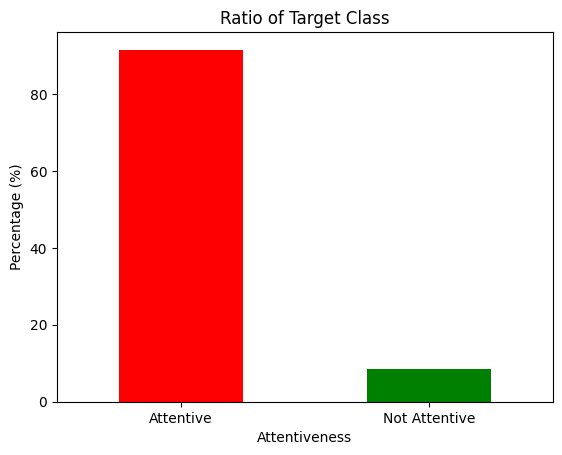

In [79]:
# Calculate percentage values
total_count = len(df)
percentage_values = df['Attentive'].value_counts(normalize=True) * 100

label_mapping = {0: 'Not Attentive', 1: 'Attentive'}
df['aAttentive'] = df['Attentive'].map(label_mapping)

percentage_values = df['aAttentive'].value_counts(normalize=True) * 100

# Plotting the histogram
percentage_values.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Attentiveness')
plt.ylabel('Percentage (%)')
plt.title('Ratio of Target Class')
plt.xticks(rotation=0)
plt.show()


In [38]:
df[df['Attentive'] == 0]['std_yaw'].mean()

14.767142857142858

In [39]:
df[df['Attentive'] == 1]['std_yaw'].mean()

6.930940265486726

In [102]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-1,1))
data = pd.read_csv('./data/timeFile_1.csv')

data[' Pitch'] = round(((data[' Pitch'] + 180) % 360), 2)
data[' Roll'] = round(((data[' Roll'] + 180) % 360), 2)
# data[' Yaw'] = round(((data[' Yaw'] + 180) % 360), 2)

# Transform 'Pitch' and 'Roll' using sine and cosine transformations
data['Pitch_sin'] = np.sin(np.radians(data[' Pitch']))
data['Pitch_cos'] = np.cos(np.radians(data[' Pitch']))
data['Roll_sin'] = np.sin(np.radians(data[' Roll']))
data['Roll_cos'] = np.cos(np.radians(data[' Roll']))
data['Yaw_sin'] = np.sin(np.radians(data[' Yaw']))
data['Yaw_cos'] = np.cos(np.radians(data[' Yaw']))

# Standardize 'Yaw'
# columns_to_standardize_yaw = [' Yaw']
# data[columns_to_standardize_yaw] = scaler.fit_transform(data[columns_to_standardize_yaw])

# Display the first few rows of the modified data
data.head()


,Elapsed Time (ms),Alphabet,Pitch,Yaw,Roll,Pitch_sin,Pitch_cos,Roll_sin,Roll_cos,Yaw_sin,Yaw_cos
0,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
1,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
2,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
3,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999
4,0,,180.0,0.259005,177.74,1.224647e-16,-1.0,0.039434,-0.999222,0.00452,0.99999


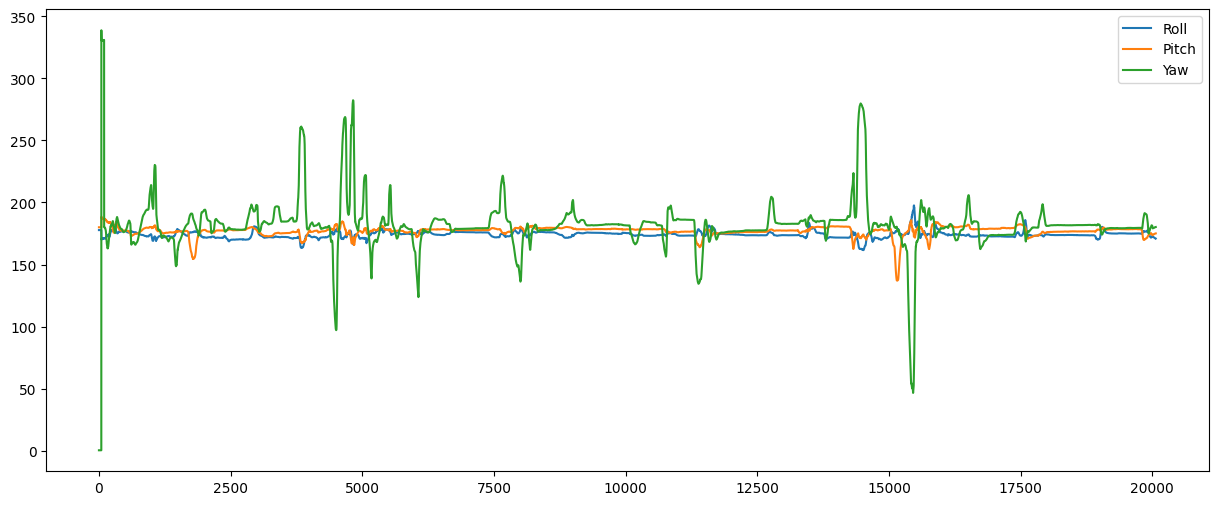

In [103]:
# data['Pitch_sin'].plot()
# data['Roll_sin'].plot()
plt.figure(figsize=(15, 6))
data[' Roll'].plot( label = 'Roll')
data[' Pitch'].plot( label = 'Pitch')
data[' Yaw'].plot( label = 'Yaw')
 
plt.legend()
# data['Pitch_cos'].plot()
# data['Roll_cos'].plot()
# data['Yaw_cos'].plot()
# data['Yaw_sin'].plot()
